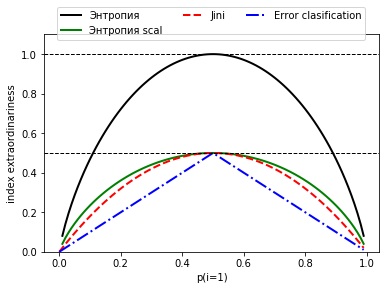

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 

def gini(p):
    return p * (1 - p) + (1 - p)* (1 - (1 - p))

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p ,1 - p])
x = np.arange(0.0,1.0,0.01)

ent = [ entropy(p) if p!=0 else None for p in x ]
sc_ent = [e * 0.5 if e else None for e in ent ]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls , c in zip([ent, sc_ent, gini(x),err], 
["Энтропия","Энтропия scal","Jini","Error clasification"],
["-","-","--","-."], 
["black","green","red","blue"]):

    line = ax.plot(x,i,label = lab, linestyle = ls, lw = 2, color = c )
ax.legend(loc = "upper center",bbox_to_anchor = (0.5,1.15),ncol = 3, 
fancybox = True, shadow = False )
ax.axhline(y = 0.5,linewidth = 1, color = "k",linestyle = "--")
ax.axhline(y = 1.0, linewidth = 1, color = "k",linestyle = "--")
plt.ylim([0,1.1])
plt.xlabel("p(i=1)")
plt.ylabel("index extraordinariness")
plt.show()

In [18]:
from sklearn import datasets as db
import numpy as np 
iris = db.load_iris()
x = iris.data[:,[2,3]]
y = iris.target 


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 0 )

tree.fit(x_train, y_train)

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test ))

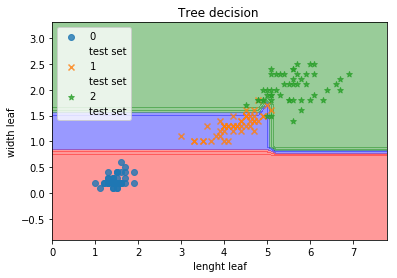

In [21]:
import func as f
import matplotlib.pyplot as plt 
f.plot_desicion_regions(
    x_combined_std,
    y_combined,
    classifier = tree,
    test_idx = range(105,150))

plt.title("Tree decision ")
plt.xlabel("lenght leaf")
plt.ylabel("width leaf")
plt.legend(loc ="best")
plt.show()

In [24]:
from sklearn.tree import export_graphviz

export_graphviz (tree, out_file = "tree.dot",
                feature_names = ["petal lenght","petal width"])


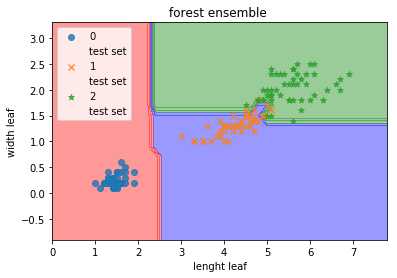

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier( criterion = "entropy", 
                                n_estimators = 10,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(x_train,y_train)
f.plot_desicion_regions(
    x_combined_std,
    y_combined,
    classifier = forest,
    test_idx = range(105,150))

plt.title("forest ensemble ")
plt.xlabel("lenght leaf")
plt.ylabel("width leaf")
plt.legend(loc ="best")
plt.show()

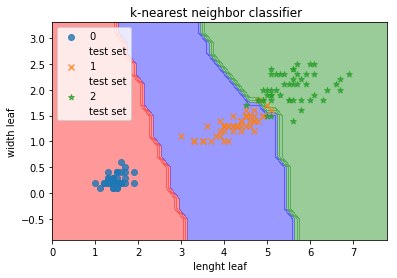

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,p = 2, metric = "minkowski")
knn.fit(x_train,y_train)
f.plot_desicion_regions(
    x_combined_std,
    y_combined,
    classifier = knn,
    test_idx = range(105,150))

plt.title("k-nearest neighbor classifier  ")
plt.xlabel("lenght leaf")
plt.ylabel("width leaf")
plt.legend(loc ="best")
plt.show()